In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Customers.csv to Customers.csv


In [3]:

customers = pd.read_csv('Customers.csv')

customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:

print(customers.info())

print(customers.isnull().sum())

print(customers.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


<ipython-input-5-b445b21789e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=customers, palette='viridis')


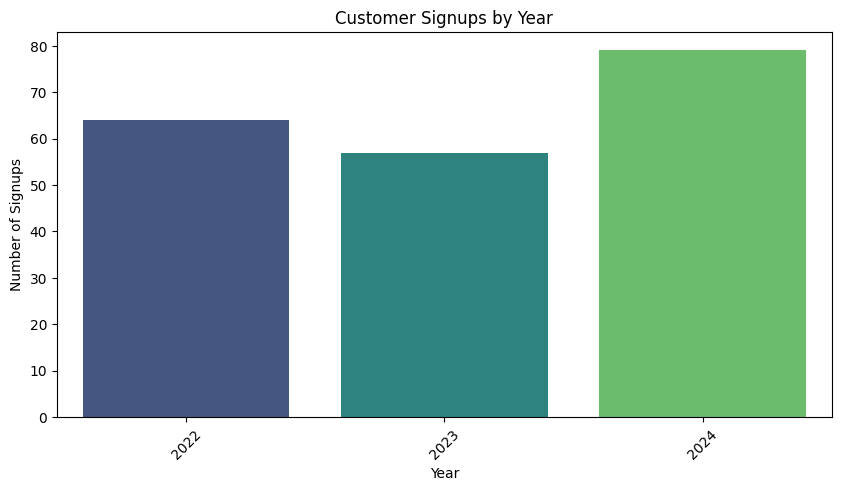

In [5]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

customers['Year'] = customers['SignupDate'].dt.year
customers['Month'] = customers['SignupDate'].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=customers, palette='viridis')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()


<ipython-input-6-ae5d90582481>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='coolwarm', order=customers['Region'].value_counts().index)


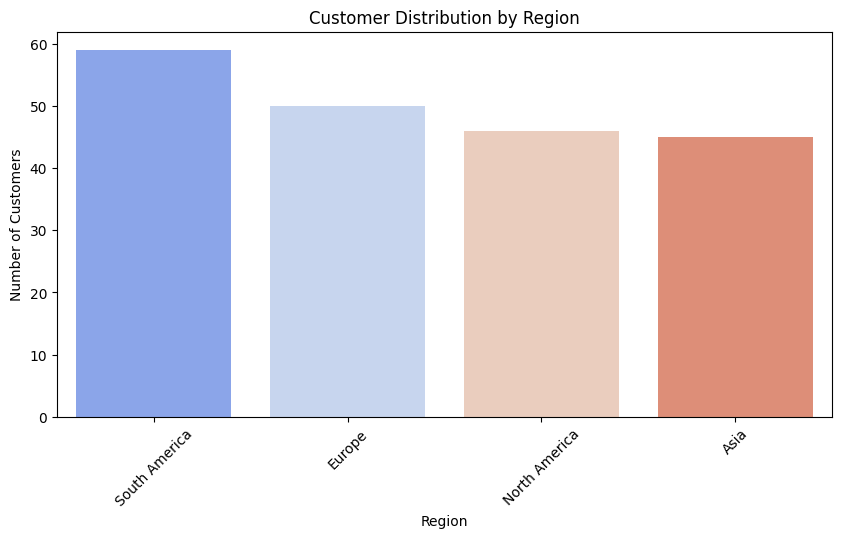

In [6]:

plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=customers, palette='coolwarm', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


Month
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
Name: CustomerID, dtype: int64


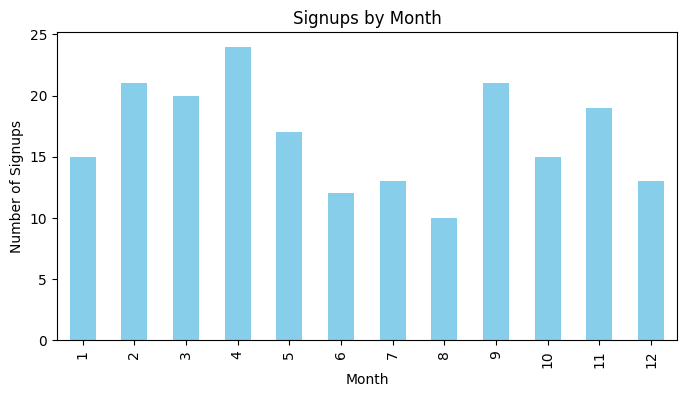

In [7]:

monthly_signups = customers.groupby('Month')['CustomerID'].count()
print(monthly_signups)

plt.figure(figsize=(8, 4))
monthly_signups.plot(kind='bar', color='skyblue')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()


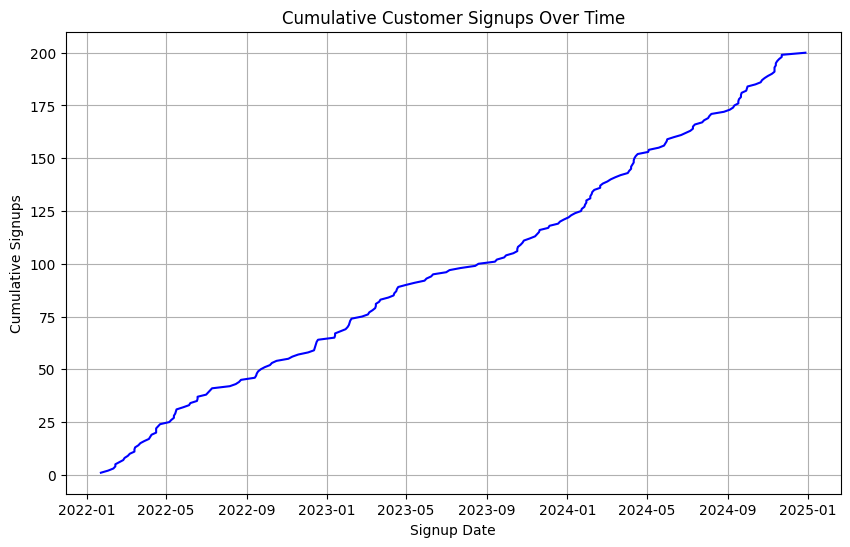

In [8]:

customers = customers.sort_values(by='SignupDate')

customers['CumulativeSignups'] = range(1, len(customers) + 1)

plt.figure(figsize=(10, 6))
plt.plot(customers['SignupDate'], customers['CumulativeSignups'], color='blue')
plt.title('Cumulative Customer Signups Over Time')
plt.xlabel('Signup Date')
plt.ylabel('Cumulative Signups')
plt.grid()
plt.show()
